In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
train= pd.read_csv('train2.csv')
test= pd.read_csv('test2.csv')

In [67]:
train.fillna(1, inplace=True)
train.replace([np.inf, -np.inf], 1, inplace=True)
test.fillna(1, inplace=True)
test.replace([np.inf, -np.inf], 1, inplace=True)

In [68]:
from scipy.stats import yeojohnson
float_columns1 = train.select_dtypes(include=['float64']).columns
# Apply Yeo-Johnson transformation to integer and float columns
for column in float_columns1:
    train[column], _ = yeojohnson(train[column])
    
float_columns2 = test.select_dtypes(include=['float64']).columns
# Apply Yeo-Johnson transformation to integer and float columns
for column in float_columns2:
    test[column], _ = yeojohnson(test[column])

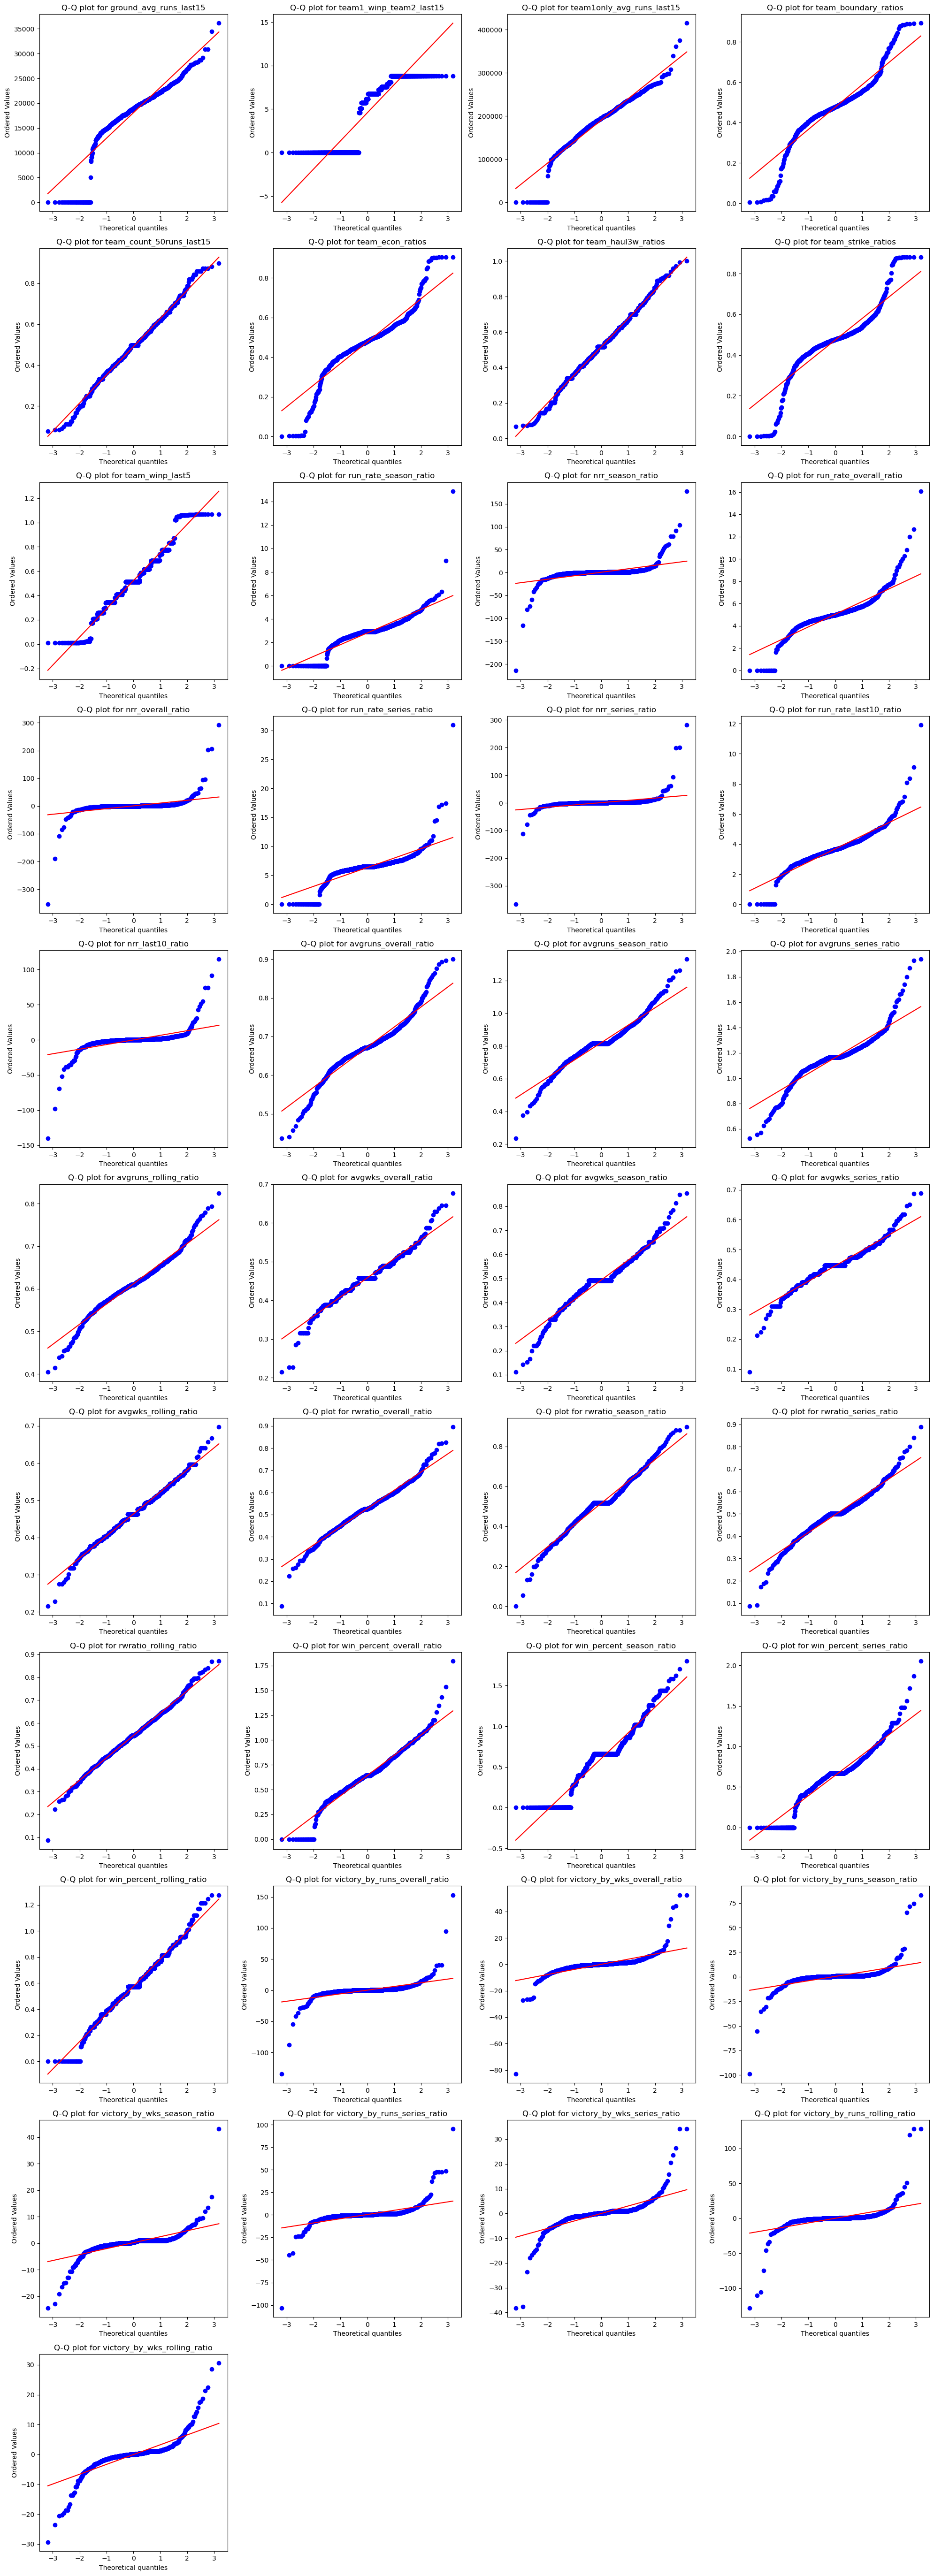

In [70]:
import scipy.stats as stats
# Number of columns to plot
num_columns = len(float_columns1)
num_rows = (num_columns + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot Q-Q plots for each integer and float column
for i, column in enumerate(float_columns):
    stats.probplot(train[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot for {column}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()


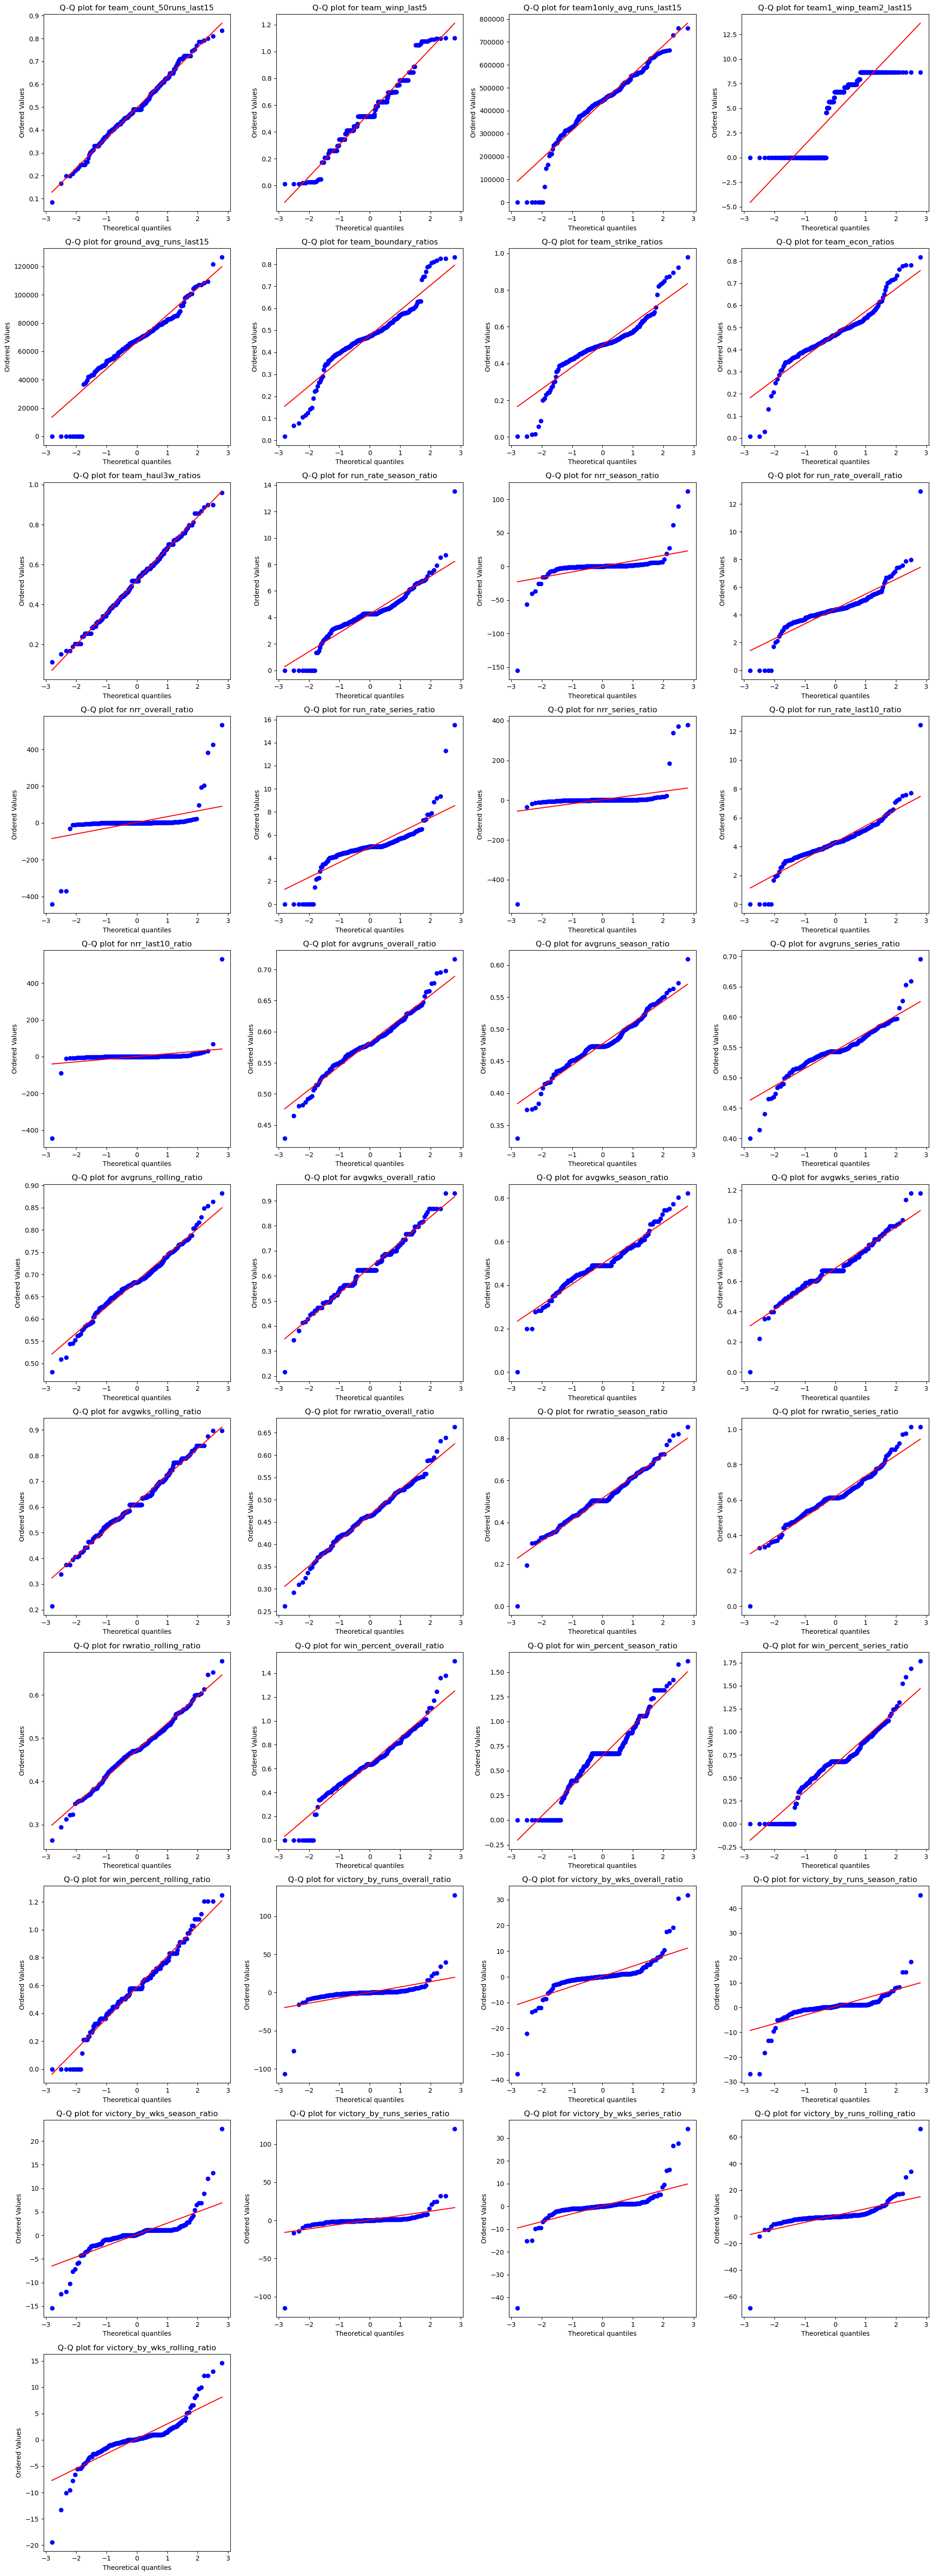

In [73]:
import scipy.stats as stats
# Number of columns to plot
num_columns = len(float_columns2)
num_rows = (num_columns + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot Q-Q plots for each integer and float column
for i, column in enumerate(float_columns2):
    stats.probplot(test[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot for {column}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

In [74]:
train_data= train
test_data= test

In [75]:
train_data['winner_01'] = train_data.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)
train_data['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)
train_data['toss_decision_01'] = np.where(train_data['toss decision']=='bat', 1, 0)
test_data['toss_decision_01'] = np.where(test_data['toss decision']=='bat', 1, 0)

In [76]:
float_columns1= float_columns1.to_list()
float_columns2= float_columns2.to_list()

In [77]:
float_columns1.append('toss_decision_01')
float_columns1.append('toss_winner_01')
float_columns2.append('toss_decision_01')
float_columns2.append('toss_winner_01')

In [78]:
X,y = train_data[float_columns1], train_data['winner_01']
X_test = test_data[X.columns.tolist()]

In [79]:
X.to_csv('Xkag.csv')
y.to_csv('ykag.csv')
X_test.to_csv('X_testkag.csv')
train_data.to_csv('train_datakag.csv')
test_data.to_csv('test_datakag.csv')